# ***Importing Libraries***


In [0]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import files
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [145]:
nltk.download

<bound method Downloader.download of <nltk.downloader.Downloader object at 0x7efe75064d30>>

# ***Loding Data Set***

In [67]:
uploaded = files.upload()

Saving data.csv to data (1).csv


In [0]:
df=pd.read_csv('data (1).csv')

In [0]:
df=df.sample(n=500, random_state=1)

# ***Data Frame Overview***

In [215]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [216]:
print(df.duplicated().sum())

0


In [217]:
print(df.isnull().sum())

URLs         0
Headline     0
Body        21
Label        0
dtype: int64


# ***Data Cleaning***


In [218]:
df=df.dropna()
print(df.isnull().sum())

URLs        0
Headline    0
Body        0
Label       0
dtype: int64


# ***Data Exploration (EDA) - Text Mining***

In [0]:
df['NEWS_WEB'] = [x.split('/')[2] for x in df.URLs]

In [220]:
df.head()

,URLs,Headline,Body,Label,NEWS_WEB
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,www.bbc.com
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,www.reuters.com
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,www.nytimes.com
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,www.reuters.com
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,www.cnn.com


In [0]:
grouped=df.groupby('NEWS_WEB').Label.value_counts()

In [222]:
print(grouped)

NEWS_WEB                   Label
abcnews.go.com             1          57
api.content-ad.net         0           2
beforeitsnews.com          0        1681
bleacherreport.com         1           8
clarivate.com              1           3
cnn.it                     1           1
dailybuzzlive.com          0          99
edition.cnn.com            1          15
inhealth.cnn.com           1          14
money.cnn.com              1          49
reuters.com                1           1
thelab.bleacherreport.com  1           1
www.activistpost.com       0         267
www.bbc.co.uk              1          10
www.bbc.com                1         333
www.cnn.com                1         389
www.disclose.tv            0          71
www.nytimes.com            1         341
www.reuters.com            1         646
Name: Label, dtype: int64


In [0]:
group_df=pd.DataFrame({'count' : df.groupby('NEWS_WEB').size()}).reset_index()

In [224]:
group_df

,NEWS_WEB,count
0,abcnews.go.com,57
1,api.content-ad.net,2
2,beforeitsnews.com,1681
3,bleacherreport.com,8
4,clarivate.com,3
5,cnn.it,1
6,dailybuzzlive.com,99
7,edition.cnn.com,15
8,inhealth.cnn.com,14
9,money.cnn.com,49


ValueError: ignored

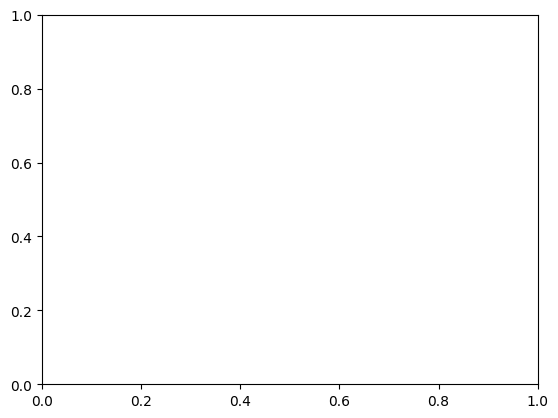

In [188]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
NEWS_WEBSITE = group_df['NEWS_WEB']
y_pos = np.arange(len(objects))
POPULARITY = group_df['count']

plt.barh(y_pos, POPULARITY, align='center', alpha=0.5)
plt.yticks(y_pos, NEWS_WEBSITE)
plt.xlabel('NEWS_WEBSITE')
plt.title('POPULARITY')

plt.show()

In [0]:
df['news'] = df.Headline + df.Body
df.Label = df.Label.map({1:'yes', 0: 'no'})

In [159]:
nltk.download()
import nltk

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


# ***Tokenizing, Removing Stop Words, Steaaming and Lemmatizing***

In [0]:
stop_words = set(stopwords.words('english'))
#lemmatize and stem
ps = PorterStemmer()
lem = WordNetLemmatizer()
#dataset=pd.read_table("sms_spam_ham.tsv", header=None, names=['label_y', 'sms'])

corpus=[]


i=0
for i in range(len(df)):
    text = df.news.iloc[i]
    text = text.lower() #changes evrything lower case
    nopunct_text = re.sub('[^a-z0-9]',' ',text) #remove non alphanumeric characters
    tokens = WhitespaceTokenizer().tokenize(nopunct_text)
    filtered = [ps.stem(lem.lemmatize(w)) for w in tokens if w not in stop_words]
    filtered_text=' '.join(filtered)
    corpus.append(filtered_text)
	
df.Label=df.Label.astype(str)
y=df.Label
X=corpus


# ***Splitting the Data Frame***

In [0]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

# ***Recurrent Neural Network***

In [0]:
vocab_size = 5000
embedding_dim = 16
max_length = 5000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [0]:
tokenizer=Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
train_sequences=tokenizer.texts_to_sequences(X_train)
train_padded=pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)


label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(y)
#
training_label_seq = np.array(label_tokenizer.texts_to_sequences(y_train))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(y_test))

# GRU Model

In [232]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 5000, 16)          80000     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                9408      
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 89,805
Trainable params: 89,805
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)


Train on 3190 samples, validate on 798 samples
Epoch 1/10


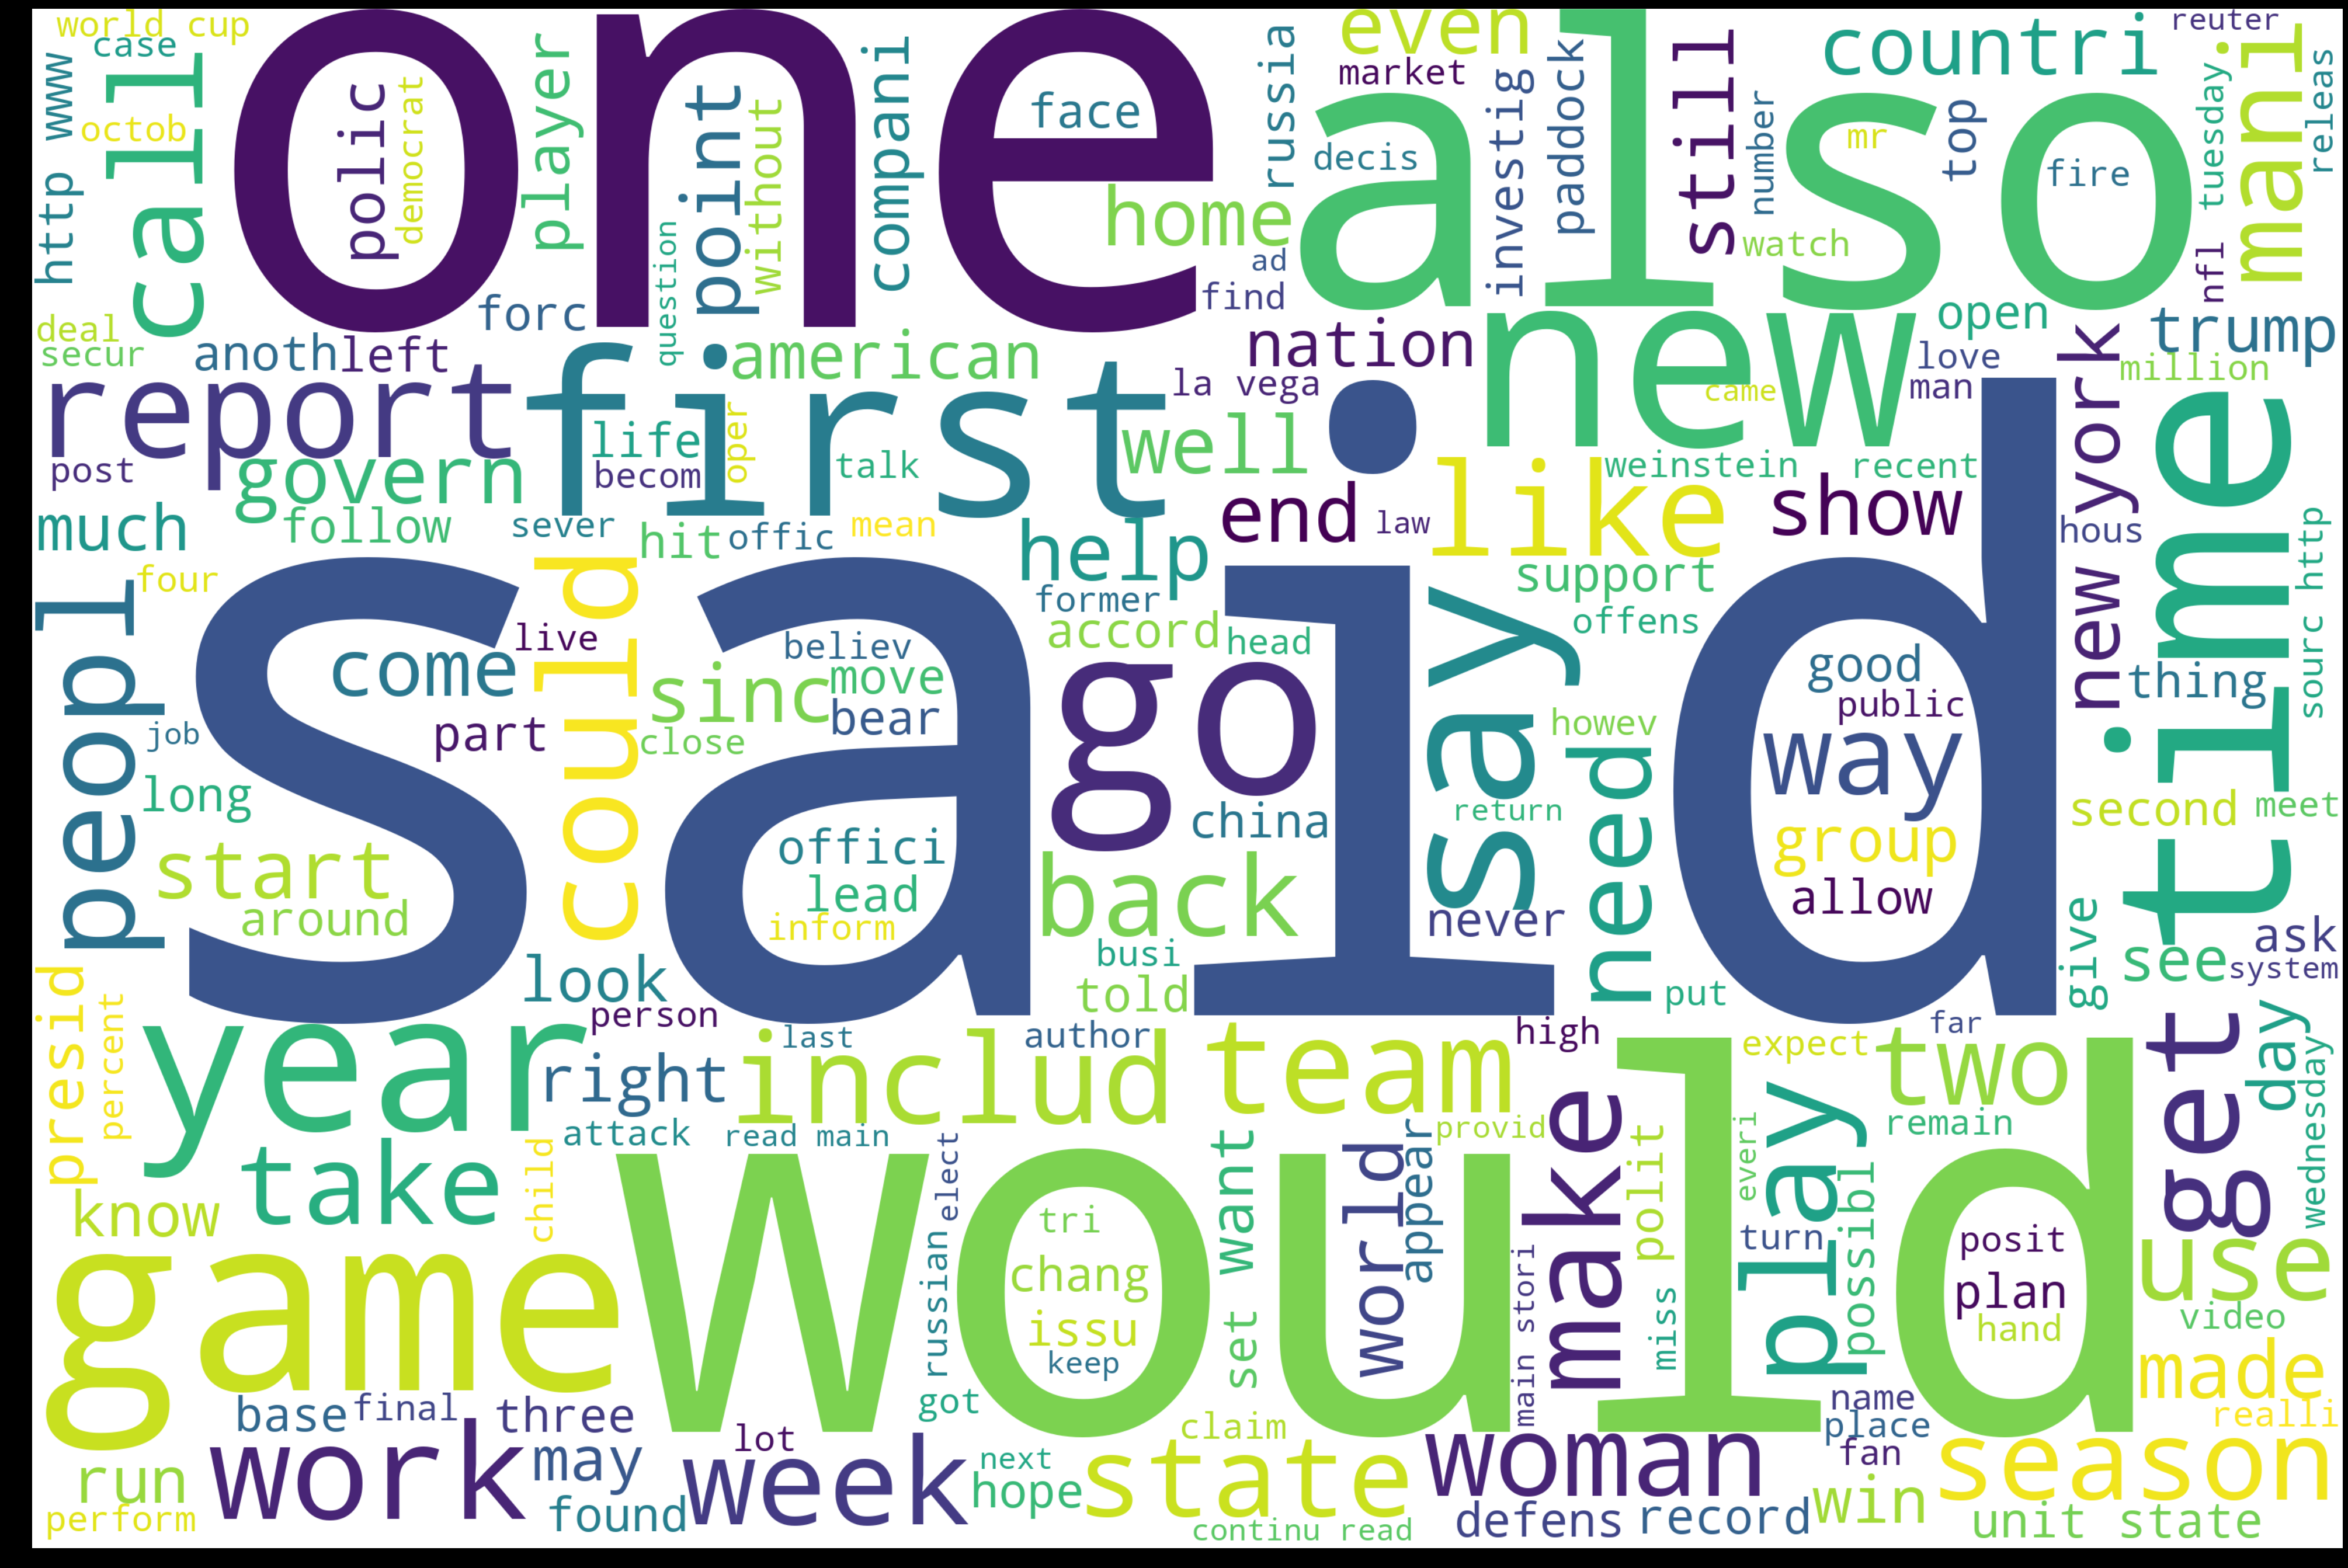

In [196]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = X
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [230]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 5000, 16)          80000     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 150       
Total params: 80,558
Trainable params: 80,558
Non-trainable params: 0
_________________________________________________________________


In [231]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 3190 samples, validate on 798 samples
Epoch 1/30
3190/3190 - 1s - loss: 1.4199 - acc: 0.5273 - val_loss: 0.9287 - val_acc: 0.5464
Epoch 2/30
3190/3190 - 1s - loss: 0.7652 - acc: 0.5285 - val_loss: 0.7101 - val_acc: 0.5677
Epoch 3/30
3190/3190 - 1s - loss: 0.7017 - acc: 0.5395 - val_loss: 0.6933 - val_acc: 0.5439
Epoch 4/30
3190/3190 - 1s - loss: 0.6937 - acc: 0.5420 - val_loss: 0.6894 - val_acc: 0.5451
Epoch 5/30
3190/3190 - 1s - loss: 0.6900 - acc: 0.5339 - val_loss: 0.6862 - val_acc: 0.5464
Epoch 6/30
3190/3190 - 1s - loss: 0.6871 - acc: 0.5495 - val_loss: 0.6808 - val_acc: 0.5451
Epoch 7/30
3190/3190 - 1s - loss: 0.6829 - acc: 0.5803 - val_loss: 0.6761 - val_acc: 0.5564
Epoch 8/30
3190/3190 - 1s - loss: 0.6743 - acc: 0.6078 - val_loss: 0.6664 - val_acc: 0.5664
Epoch 9/30
3190/3190 - 1s - loss: 0.6613 - acc: 0.6655 - val_loss: 0.6550 - val_acc: 0.7744
Epoch 10/30
3190/3190 - 1s - loss: 0.6438 - acc: 0.7107 - val_loss: 0.6317 - val_acc: 0.7193
Epoch 11/30
3190/3190 - 1s - los